In [1]:
from dataset import read_raw_files, create_df, get_or_build_tokenizer
from config import get_config
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
config = get_config()

In [3]:
train_file, test_file = read_raw_files(config)
train_df, test_df = create_df(train = train_file, test = test_file)

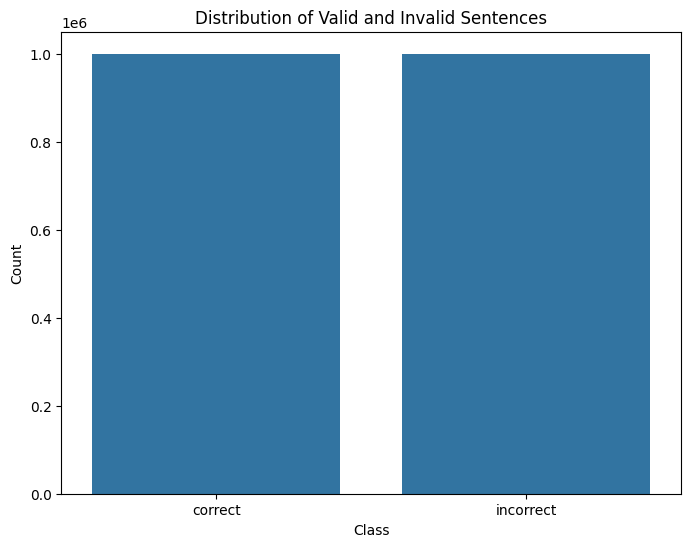

In [4]:

# Plot using seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(x ='class', data = train_df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Valid and Invalid Sentences')
plt.show()


In [5]:
train_tokenizer = get_or_build_tokenizer(config, train_df)

hello how are u?
[('Let', (0, 3)), ("'", (3, 4)), ('s', (4, 5)), ('test', (6, 10)), ('my', (11, 13)), ('pre', (14, 17)), ('-', (17, 18)), ('tokenizer', (18, 27)), ('.', (27, 28))]





In [6]:
token_lens = []

for txt in train_df.sentence:
    tokens = train_tokenizer.encode(txt)
    token_lens.append(len(tokens))

max_len = max(token_lens)
print(f"Max sentence length is {max_len}")

Max sentence length is 57


Text(0.5, 9.444444444444438, 'Token Count')

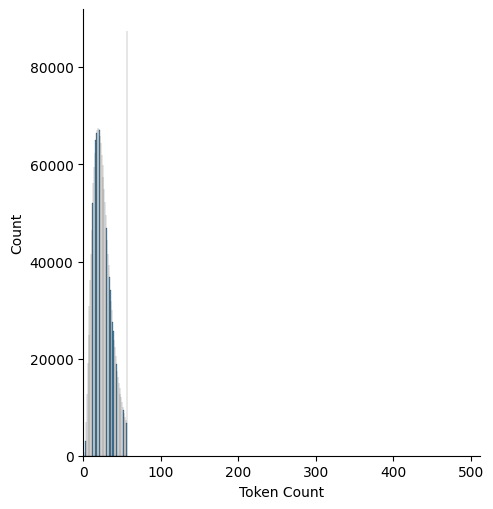

In [7]:
sns.displot(token_lens)
plt.xlim([0,512])
plt.xlabel('Token Count')

<Axes: xlabel='token_lens', ylabel='Density'>

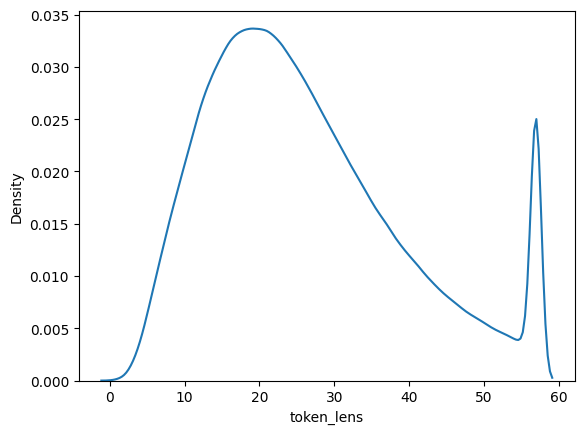

In [8]:
train_df['token_lens'] = token_lens
sns.kdeplot(train_df['token_lens'])

In [9]:
percentiles = train_df['token_lens'].quantile([0.90, 0.95, 0.99])
print(percentiles)

0.90    46.0
0.95    55.0
0.99    57.0
Name: token_lens, dtype: float64


95% of sentences are within 55 tokens. So set max_seq_len = 57 (plus SOS and EOS tokens)

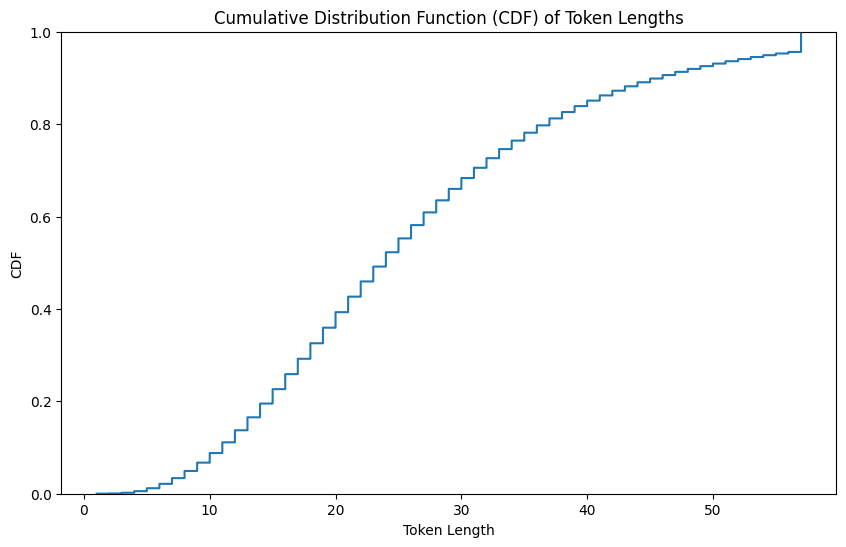

In [10]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(train_df['token_lens'])
plt.xlabel('Token Length')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Token Lengths')
plt.show()